In [ ]:
#跑的很慢  blog http://blog.csdn.net/u010099080/article/details/52894773

Epoch: 0050 cost= 2283267840.000 W= 20.3468 b= 12946.1
Epoch: 0100 cost= 2196301312.000 W= 19.0348 b= 24403.0
Epoch: 0150 cost= 2128098304.000 W= 17.8765 b= 34479.8
Epoch: 0200 cost= 2074898560.000 W= 16.8603 b= 43292.7
Epoch: 0250 cost= 2033543424.000 W= 15.9734 b= 50965.6
Epoch: 0300 cost= 2001449728.000 W= 15.2025 b= 57622.5
Epoch: 0350 cost= 1976552448.000 W= 14.5347 b= 63380.7
Epoch: 0400 cost= 1957217920.000 W= 13.9576 b= 68350.8
Epoch: 0450 cost= 1942166656.000 W= 13.4598 b= 72634.6
Epoch: 0500 cost= 1930413056.000 W= 13.0309 b= 76322.4
Epoch: 0550 cost= 1921199744.000 W= 12.6618 b= 79494.4
Epoch: 0600 cost= 1913948800.000 W= 12.3445 b= 82220.4
Epoch: 0650 cost= 1908209408.000 W= 12.0717 b= 84563.0
Epoch: 0700 cost= 1903651584.000 W= 11.8376 b= 86572.5
Epoch: 0750 cost= 1900003840.000 W= 11.6364 b= 88299.8
Epoch: 0800 cost= 1897074560.000 W= 11.4638 b= 89781.1
Epoch: 0850 cost= 1894714496.000 W= 11.3161 b= 91048.4
Epoch: 0900 cost= 1892791936.000 W= 11.189 b= 92139.6
Epoch: 0950

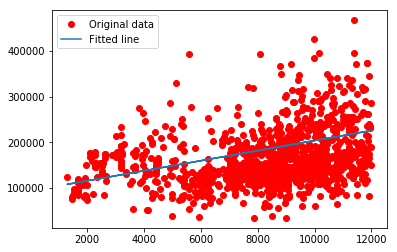

In [2]:
from __future__ import print_function, division
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
# 我是在Jupyter Notebook里运行的，所以需要这行
#%matplotlib inline

# 读入数据
train = pd.read_csv("Dataset/train.csv")
# 选取房屋面积小于１２０００的数据
train = train[train['LotArea'] < 12000]
train_X = train['LotArea'].values.reshape(-1, 1)
train_Y = train['SalePrice'].values.reshape(-1, 1)

n_samples = train_X.shape[0]
# 学习率
learning_rate = 2
# 迭代次数
training_epochs = 1000
# 每多少次输出一次迭代结果
display_step = 50

# 这个X和Y和上面的train_X,train_Y是不一样的，这里只是个占位符，
# 训练开始的时候需要“喂”(feed)数据给它
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
# 定义模型参数
W = tf.Variable(np.random.randn(), name="weight", dtype=tf.float32)
b = tf.Variable(np.random.randn(), name="bias", dtype=tf.float32)

# 定义模型
pred = tf.add(tf.multiply(W, X), b)
# 定义损失函数
cost = tf.reduce_sum(tf.pow(pred-Y, 2)) / (2 * n_samples)
# 使用Adam算法，至于为什么不使用一般的梯度下降算法，一会说
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# 初始化所有变量
init = tf.global_variables_initializer()

# 训练开始
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        if (epoch + 1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print("Epoch:", '%04d' % (epoch + 1), "cost=", "{:.3f}".format(c), "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # 画图
    plt.plot(train_X, train_Y, 'ro', label="Original data")
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label="Fitted line")
    plt.legend()
    plt.show()